In [87]:
import numpy as np
import pandas as pd

<b>All neccessary documentation can be found here:</b><br>
https://pandas.pydata.org/docs/getting_started/index.html

Access the link and on the page review everything highlighted
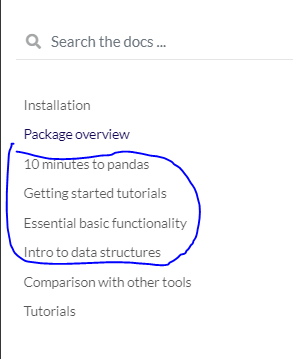

<b>After familiarizing with basics review everything under USER GUIDE</b><br>
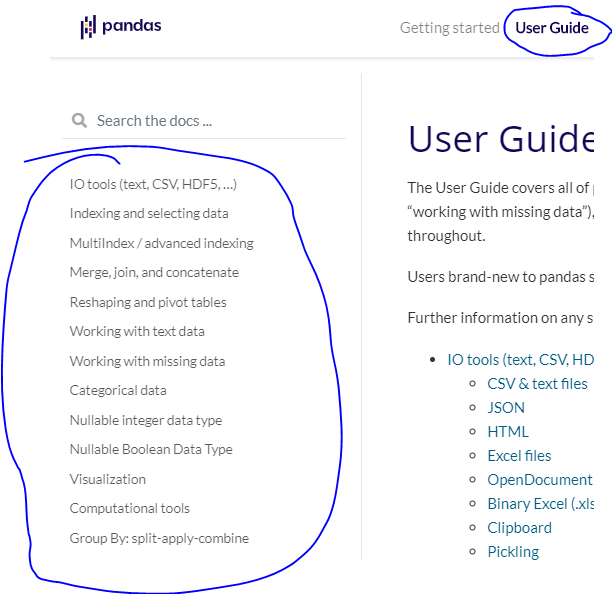

# Data Structures

## Series

https://pandas.pydata.org/docs/getting_started/dsintro.html

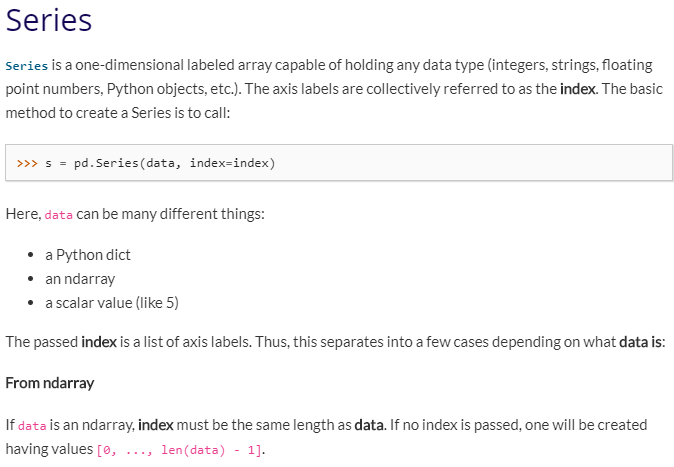

<b>From np.array</b>

In [88]:
s = pd.Series(np.random.randn(5),index=list('abcde'))
s

a   -0.266778
b   -0.856062
c    1.559315
d   -1.092689
e    0.758042
dtype: float64

<b>From dictionary</b>

In [89]:
d = {'a': 0., 'b': 1., 'c': 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [90]:
pd.Series(d,index=list('abcde'))

a    0.0
b    1.0
c    2.0
d    NaN
e    NaN
dtype: float64

In [91]:
s = pd.Series(4, index = list('abcd'))
s

a    4
b    4
c    4
d    4
dtype: int64

<b>A Series is like a fixed-size dict in that you can get and set values by index label:</b>

In [92]:
#seeding random number generator to get the same randon numbers
np.random.seed(100)

s=pd.Series(np.random.randint(0,10,5), index=list('abcde'))
s['a']

8

<b>Series is similar to np arrays and support similar slicing as lists</b>

In [93]:
s[1]

8

In [94]:
#cheking variable type within series
s.dtype

dtype('int32')

<b>When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with Series in pandas. Series can also be passed into most NumPy methods expecting an ndarray.</b>

In [95]:
s + s

a    16
b    16
c     6
d    14
e    14
dtype: int32

In [96]:
s * 3

a    24
b    24
c     9
d    21
e    21
dtype: int32

<b>Series operations will align rows based on row indecies, so no need to worry about lining out the rows</b>

In [97]:
s[1:]

b    8
c    3
d    7
e    7
dtype: int32

In [98]:
s[:-1]

a    8
b    8
c    3
d    7
dtype: int32

In [99]:
s[1:] + s[:-1]

a     NaN
b    16.0
c     6.0
d    14.0
e     NaN
dtype: float64

## DataFrame

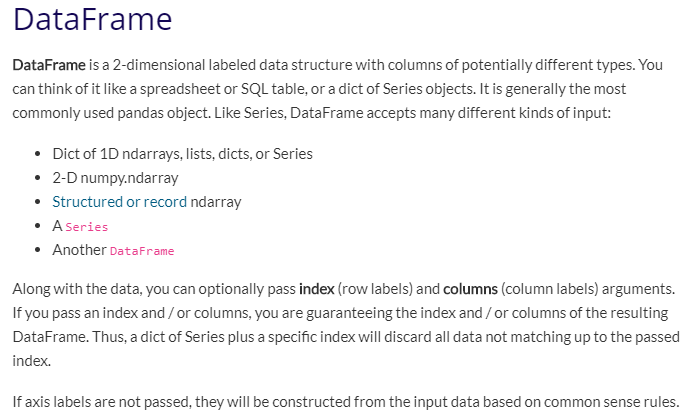

In [100]:
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
d

{'one': a    1.0
 b    2.0
 c    3.0
 dtype: float64,
 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [101]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [102]:
d = {'one': [1., 2., 3., 4.],
     'two': [4., 3., 2., 1.]}

df = pd.DataFrame(d)
df

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [103]:
pd.DataFrame(d,index=list('ABCD'))

,one,two
A,1.0,4.0
B,2.0,3.0
C,3.0,2.0
D,4.0,1.0


In [104]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
    ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
    ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
    ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
    ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

# Attributes and underlying data

<b>Common attributes:</b>

In [105]:
df=pd.DataFrame(np.random.randn(4,3),columns=list('abc'),index=range(1,5))

In [106]:
df.dtypes

a    float64
b    float64
c    float64
dtype: object

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 1 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       4 non-null      float64
 1   b       4 non-null      float64
 2   c       4 non-null      float64
dtypes: float64(3)
memory usage: 228.0 bytes


In [108]:
df.describe()

,a,b,c
count,4.000000,4.000000,4.000000
mean,-0.282432,0.606086,-0.509986
std,0.687711,1.151077,0.630561
min,-1.179703,-0.234715,-1.439737
25%,-0.593651,0.007750,-0.632766
50%,-0.191420,0.177294,-0.243205
75%,0.119799,0.775630,-0.120425
max,0.432817,2.304473,-0.113795


In [109]:
df.columns

Index(['a', 'b', 'c'], dtype='object')

In [110]:
df.index

RangeIndex(start=1, stop=5, step=1)

<b>Column names can be changed as following</b>

In [111]:
df.columns=[x.upper() for x in df.columns]
df.head(2)

,A,B,C
1,-1.179703,0.088571,-0.363776
2,-0.398300,-0.234715,-1.439737


In [112]:
df[:2]
#slice first 2 rows

,A,B,C
1,-1.179703,0.088571,-0.363776
2,-0.398300,-0.234715,-1.439737


In [113]:
df[['A','B']]
#slice columns

,A,B
1,-1.179703,0.088571
2,-0.398300,-0.234715
3,0.432817,2.304473
4,0.015459,0.266016


<b>To get the actual data inside index or col use .array or .to_numpy()</b>

In [114]:
df.index.array

<PandasArray>
[1, 2, 3, 4]
Length: 4, dtype: int64

In [115]:
df.index.to_numpy()

array([1, 2, 3, 4], dtype=int64)

In [116]:
df = pd.DataFrame({
'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})
df

,one,two,three
a,1.011066,1.376996,NaN
b,-1.440771,-0.230285,0.271005
c,0.980569,0.480924,2.140763
d,NaN,-1.266911,0.475369


In [117]:
row=df.iloc[1]
col=df['two']
df.sub(row, axis=1)

,one,two,three
a,2.451837,1.607281,NaN
b,0.000000,0.000000,0.000000
c,2.421340,0.711209,1.869758
d,NaN,-1.036625,0.204364


In [118]:
df.sub(col,axis=0)

,one,two,three
a,-0.365930,0.0,NaN
b,-1.210486,0.0,0.501290
c,0.499645,0.0,1.659839
d,NaN,0.0,1.742280


In [119]:
multiIndex=list(zip(np.arange(2).repeat(2),list('abcd')))

In [120]:
df.index=pd.MultiIndex.from_tuples(multiIndex, names=['first','second'])

In [121]:
df.sub(col,axis=0,level=1)

one  two     three
first second                         
0     a      -0.365930  0.0       NaN
      b      -1.210486  0.0  0.501290
1     c       0.499645  0.0  1.659839
      d            NaN  0.0  1.742280

In [122]:
df.index.get_level_values(0).unique().to_list()

[0, 1]

In [123]:
df.sub(pd.Series([1,5],index=df.index.get_level_values(0).unique())
       ,axis=0,level=0)

one       two     three
first second                              
0     a       0.011066  0.376996       NaN
      b      -2.440771 -1.230285 -0.728995
1     c      -4.019431 -4.519076 -2.859237
      d            NaN -6.266911 -4.524631

# Missing Data

In [124]:
df=df.droplevel(0,axis=0)
df2=df.copy()

In [125]:
df2.replace(np.nan,10,inplace=True)
df.add(df2,fill_value=10)

,one,two,three
second,,,
a,2.022132,2.753993,20.000000
b,-2.881542,-0.460570,0.542010
c,1.961138,0.961848,4.281526
d,20.000000,-2.533821,0.950738


# Boolean Reduction 

In [126]:
(df>0).all(axis=1)

second
a    False
b    False
c     True
d    False
dtype: bool

In [127]:
(df>0).all().all()

False

In [128]:
pd.Series([0,1,1,1,0]).map(lambda x: bool(x))

0    False
1     True
2     True
3     True
4    False
dtype: bool

In [129]:
df2=df
df==df2
#can't compare Nans

,one,two,three
second,,,
a,True,True,False
b,True,True,True
c,True,True,True
d,False,True,True


In [130]:
df.eq(df2) #compares elemnt wise same as ==

,one,two,three
second,,,
a,True,True,False
b,True,True,True
c,True,True,True
d,False,True,True


In [131]:
#to compare nan's
df.equals(df2)

True

In [132]:
pd.Series(['foo','bar','barz'])=='foo'

0     True
1    False
2    False
dtype: bool

# Combining overlapping tables

In [133]:
df1 = pd.DataFrame({'A': [1., np.nan, 3., 5., np.nan],
'B': [np.nan, 2., 3., np.nan, 6.]})

df2 = pd.DataFrame({'A': [5., 2., 4., np.nan, 3., 7.],
'B': [np.nan, np.nan, 3., 4., 6., 8.]})

In [134]:
df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [135]:
df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,8.0


In [136]:
df.index=df.index[::-1]
df.index

Index(['d', 'c', 'b', 'a'], dtype='object', name='second')

In [137]:
df1=df1.combine_first(df2)

In [138]:
df1

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


# Descriptive Statistics

In [139]:
df.mean(0)

one      0.183621
two      0.090181
three    0.962379
dtype: float64

In [140]:
df.mean(1)

second
d    1.194031
c   -0.466684
b    1.200752
a   -0.395771
dtype: float64

In [141]:
df.sum()

one      0.550864
two      0.360725
three    2.887137
dtype: float64

In [142]:
df.sum(skipna=False)

one           NaN
two      0.360725
three         NaN
dtype: float64

In [143]:
df.iloc[:,:]=np.arange(12).reshape(4,3)
df

,one,two,three
second,,,
d,0,1,2
c,3,4,5
b,6,7,8
a,9,10,11


In [144]:
df.mean(axis=0)

one      4.5
two      5.5
three    6.5
dtype: float64

In [145]:
df.sub(df.mean(axis=0),axis=1)

,one,two,three
second,,,
d,-4.5,-4.5,-4.5
c,-1.5,-1.5,-1.5
b,1.5,1.5,1.5
a,4.5,4.5,4.5


In [146]:
df[df.isnull()]=100

In [147]:
df

,one,two,three
second,,,
d,0,1,2
c,3,4,5
b,6,7,8
a,9,10,11


In [148]:
df=pd.DataFrame(np.random.randint(1,145,(40,5)),columns=list('abcde'))
df.head()

,a,b,c,d,e
0,64,28,57,114,48
1,110,39,19,18,73
2,14,107,31,18,54
3,69,92,79,1,14
4,107,132,71,132,139


In [149]:
df.describe()

,a,b,c,d,e
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,73.900000,65.650000,65.375000,82.725000,79.425000
std,42.795758,38.152561,34.116458,44.209865,43.176969
min,1.000000,1.000000,9.000000,1.000000,3.000000
25%,36.500000,36.750000,41.250000,39.000000,46.750000
50%,77.000000,62.000000,66.500000,86.500000,89.500000
75%,111.000000,100.500000,89.000000,129.250000,116.250000
max,143.000000,139.000000,124.000000,144.000000,144.000000


In [150]:
df.describe(percentiles=[.2,.50,.75])

,a,b,c,d,e
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,73.900000,65.650000,65.375000,82.725000,79.425000
std,42.795758,38.152561,34.116458,44.209865,43.176969
min,1.000000,1.000000,9.000000,1.000000,3.000000
20%,30.000000,33.800000,30.800000,37.000000,42.400000
50%,77.000000,62.000000,66.500000,86.500000,89.500000
75%,111.000000,100.500000,89.000000,129.250000,116.250000
max,143.000000,139.000000,124.000000,144.000000,144.000000


In [151]:
df.a=df.a.astype('str')

In [152]:
df.dtypes

a    object
b     int32
c     int32
d     int32
e     int32
dtype: object

In [153]:
df.columns=map(str.upper,df.columns)
df.columns
df.columns=[x.lower() for x in df.columns]
df.columns

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [154]:
df.iloc[:,1:].idxmax(axis=0)

b    13
c    30
d    20
e    37
dtype: int64

In [155]:
df.b.value_counts(bins=4)

(35.5, 70.0]      15
(104.5, 139.0]     9
(0.861, 35.5]      9
(70.0, 104.5]      7
Name: b, dtype: int64

In [156]:
df.a=df.a.astype(dtype='int')
df.dtypes

a    int32
b    int32
c    int32
d    int32
e    int32
dtype: object

In [157]:
pd.cut(df['a'],[0,20,50])

0              NaN
1              NaN
2      (0.0, 20.0]
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9     (20.0, 50.0]
10    (20.0, 50.0]
11             NaN
12     (0.0, 20.0]
13    (20.0, 50.0]
14             NaN
15     (0.0, 20.0]
16    (20.0, 50.0]
17             NaN
18     (0.0, 20.0]
19    (20.0, 50.0]
20             NaN
21             NaN
22    (20.0, 50.0]
23             NaN
24    (20.0, 50.0]
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
30             NaN
31    (20.0, 50.0]
32             NaN
33             NaN
34             NaN
35             NaN
36    (20.0, 50.0]
37    (20.0, 50.0]
38             NaN
39    (20.0, 50.0]
Name: a, dtype: category
Categories (2, interval[int64]): [(0, 20] < (20, 50]]

In [158]:
pd.qcut(df.a,[.25,.5])

0     (36.499, 77.0]
1                NaN
2                NaN
3     (36.499, 77.0]
4                NaN
5                NaN
6     (36.499, 77.0]
7                NaN
8                NaN
9                NaN
10    (36.499, 77.0]
11    (36.499, 77.0]
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19               NaN
20               NaN
21               NaN
22               NaN
23               NaN
24    (36.499, 77.0]
25    (36.499, 77.0]
26               NaN
27               NaN
28               NaN
29               NaN
30               NaN
31    (36.499, 77.0]
32               NaN
33               NaN
34               NaN
35               NaN
36    (36.499, 77.0]
37    (36.499, 77.0]
38               NaN
39               NaN
Name: a, dtype: category
Categories (1, interval[float64]): [(36.499, 77.0]]

In [159]:
pd.cut(df.a,[-np.inf,0,np.inf])

0     (0.0, inf]
1     (0.0, inf]
2     (0.0, inf]
3     (0.0, inf]
4     (0.0, inf]
5     (0.0, inf]
6     (0.0, inf]
7     (0.0, inf]
8     (0.0, inf]
9     (0.0, inf]
10    (0.0, inf]
11    (0.0, inf]
12    (0.0, inf]
13    (0.0, inf]
14    (0.0, inf]
15    (0.0, inf]
16    (0.0, inf]
17    (0.0, inf]
18    (0.0, inf]
19    (0.0, inf]
20    (0.0, inf]
21    (0.0, inf]
22    (0.0, inf]
23    (0.0, inf]
24    (0.0, inf]
25    (0.0, inf]
26    (0.0, inf]
27    (0.0, inf]
28    (0.0, inf]
29    (0.0, inf]
30    (0.0, inf]
31    (0.0, inf]
32    (0.0, inf]
33    (0.0, inf]
34    (0.0, inf]
35    (0.0, inf]
36    (0.0, inf]
37    (0.0, inf]
38    (0.0, inf]
39    (0.0, inf]
Name: a, dtype: category
Categories (2, interval[float64]): [(-inf, 0.0] < (0.0, inf]]

# Function Application

###### pipe()

In [160]:
def insert_F (df):
    df['F']=np.arange(len(df))
    return df

def cap_Col (df):
    df.columns=map(str.upper,df.columns)
    return df

In [161]:
df.pipe(insert_F).pipe(cap_Col)
df.head()

,A,B,C,D,E,F
0,64,28,57,114,48,0
1,110,39,19,18,73,1
2,14,107,31,18,54,2
3,69,92,79,1,14,3
4,107,132,71,132,139,4


###### apply()

In [162]:
df.idxmax(axis=0)
df.apply(lambda x: x.idxmax(),axis=0)

A    32
B    13
C    30
D    20
E    37
F    39
dtype: int64

In [163]:
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide

In [164]:
df.apply(subtract_and_divide,args=(5,3)).head()

,A,B,C,D,E,F
0,19.666667,7.666667,17.333333,36.333333,14.333333,-1.666667
1,35.000000,11.333333,4.666667,4.333333,22.666667,-1.333333
2,3.000000,34.000000,8.666667,4.333333,16.333333,-1.000000
3,21.333333,29.000000,24.666667,-1.333333,3.000000,-0.666667
4,34.000000,42.333333,22.000000,42.333333,44.666667,-0.333333


In [165]:
df.apply(subtract_and_divide,args=(5,),divide=3).head()

,A,B,C,D,E,F
0,19.666667,7.666667,17.333333,36.333333,14.333333,-1.666667
1,35.000000,11.333333,4.666667,4.333333,22.666667,-1.333333
2,3.000000,34.000000,8.666667,4.333333,16.333333,-1.000000
3,21.333333,29.000000,24.666667,-1.333333,3.000000,-0.666667
4,34.000000,42.333333,22.000000,42.333333,44.666667,-0.333333


In [166]:
df.iloc[2]=np.nan
df.isnull().any(axis=1)

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

In [167]:
df=df.apply(pd.Series.interpolate)
df.isnull().any(axis=1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

###### agg()

In [168]:
df=pd.DataFrame(np.random.rand(4,5),columns=list('abcde'))
df.agg(np.sum)

a    2.762888
b    2.931231
c    1.418909
d    2.210151
e    2.513546
dtype: float64

In [169]:
df.agg('sum')

a    2.762888
b    2.931231
c    1.418909
d    2.210151
e    2.513546
dtype: float64

In [170]:
df.agg(['sum','mean'],axis=1)

,sum,mean
0,3.084692,0.616938
1,2.852308,0.570462
2,2.319953,0.463991
3,3.579772,0.715954


In [171]:
df.agg(['sum',lambda x: x.mean()])

,a,b,c,d,e
sum,2.762888,2.931231,1.418909,2.210151,2.513546
<lambda>,0.690722,0.732808,0.354727,0.552538,0.628387


In [172]:
def test(x):
    return x.mean()

df.agg(['sum',test])

,a,b,c,d,e
sum,2.762888,2.931231,1.418909,2.210151,2.513546
test,0.690722,0.732808,0.354727,0.552538,0.628387


In [173]:
df.agg({'a':'sum','b':'mean'})

a    2.762888
b    0.732808
dtype: float64

In [174]:
df.agg({'a':['sum','max'],'b':'mean'})

,a,b
max,0.954748,NaN
mean,NaN,0.732808
sum,2.762888,NaN


In [175]:
df.mask(df<0.5)

,a,b,c,d,e
0,0.952377,0.810574,NaN,0.596234,NaN
1,0.592398,0.893752,0.554021,NaN,NaN
2,NaN,0.542281,NaN,0.635637,0.796405
3,0.954748,0.684624,NaN,NaN,0.966693


# Reindexing and Altering labels

###### reindex()

In [176]:
s=pd.Series(np.random.randn(5),index=list('abcde'))
s

a   -0.415816
b   -1.358503
c   -0.514430
d   -0.216060
e    0.422380
dtype: float64

In [177]:
s.reindex(['e', 'b', 'f', 'd'])

e    0.422380
b   -1.358503
f         NaN
d   -0.216060
dtype: float64

In [178]:
df

,a,b,c,d,e
0,0.952377,0.810574,0.294330,0.596234,0.431178
1,0.592398,0.893752,0.554021,0.492867,0.319270
2,0.263366,0.542281,0.082265,0.635637,0.796405
3,0.954748,0.684624,0.488293,0.485414,0.966693


In [179]:
df.reindex(index=[2,1,3,0], columns=list('ecbda'))

,e,c,b,d,a
2,0.796405,0.082265,0.542281,0.635637,0.263366
1,0.319270,0.554021,0.893752,0.492867,0.592398
3,0.966693,0.488293,0.684624,0.485414,0.954748
0,0.431178,0.294330,0.810574,0.596234,0.952377


###### align()

In [180]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s1 = s[:4]
s2=s[1:]
s1

a   -1.094043
b    1.236908
c   -0.230285
d   -0.704418
dtype: float64

In [181]:
s2

b    1.236908
c   -0.230285
d   -0.704418
e   -0.591375
dtype: float64

In [182]:
s1.align(s2)

(a   -1.094043
 b    1.236908
 c   -0.230285
 d   -0.704418
 e         NaN
 dtype: float64,
 a         NaN
 b    1.236908
 c   -0.230285
 d   -0.704418
 e   -0.591375
 dtype: float64)

###### drop()

In [183]:
df.drop(['a','b'],axis=1)

,c,d,e
0,0.294330,0.596234,0.431178
1,0.554021,0.492867,0.319270
2,0.082265,0.635637,0.796405
3,0.488293,0.485414,0.966693


In [184]:
df=df.rename({'c':'i'}, axis=1)
df

,a,b,i,d,e
0,0.952377,0.810574,0.294330,0.596234,0.431178
1,0.592398,0.893752,0.554021,0.492867,0.319270
2,0.263366,0.542281,0.082265,0.635637,0.796405
3,0.954748,0.684624,0.488293,0.485414,0.966693


###### Sorting

In [185]:
df.sort_index(axis=1)

,a,b,d,e,i
0,0.952377,0.810574,0.596234,0.431178,0.294330
1,0.592398,0.893752,0.492867,0.319270,0.554021
2,0.263366,0.542281,0.635637,0.796405,0.082265
3,0.954748,0.684624,0.485414,0.966693,0.488293


In [186]:
df.a.searchsorted(1)

4

In [187]:
df.a.nsmallest(3)

2    0.263366
1    0.592398
0    0.952377
Name: a, dtype: float64

In [188]:
df.nlargest(3,['a','b'])

,a,b,i,d,e
3,0.954748,0.684624,0.488293,0.485414,0.966693
0,0.952377,0.810574,0.294330,0.596234,0.431178
1,0.592398,0.893752,0.554021,0.492867,0.319270
